In [159]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from ggplot import *
import sys

from sklearn import cluster as sc
from sklearn.manifold import TSNE
from kmodes.kmodes import KModes
from sklearn.preprocessing import StandardScaler
import plotly.graph_objs as go
import plotly as py 
py.tools.set_credentials_file(username='hbpvanLaatum', api_key='gIm1W4VzUfg1V8LYtQHe')


In [160]:
data = pd.read_csv('../Data/final_data.csv', ',')
indices = [i for i in range(57,167)] + [i for i in range(35,47)]
data = data.drop(data[data.columns[indices]], axis=1)
X = data.values

In [133]:
data.columns.shape
tnse = TSNE(n_components=3, verbose=1)
tnse_result = tnse.fit_transform(X)


[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 2145 samples in 0.013s...
[t-SNE] Computed neighbors for 2145 samples in 0.446s...
[t-SNE] Computed conditional probabilities for sample 1000 / 2145
[t-SNE] Computed conditional probabilities for sample 2000 / 2145
[t-SNE] Computed conditional probabilities for sample 2145 / 2145
[t-SNE] Mean sigma: 0.000000
[t-SNE] KL divergence after 250 iterations with early exaggeration: 75.889343
[t-SNE] Error after 1000 iterations: 1.019319


In [134]:
labels = KModes(n_clusters=4, init='Huang', n_init=10, verbose=1).fit_predict(X)

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 574, cost: 10372.0
Run 1, iteration: 2/100, moves: 304, cost: 10372.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 527, cost: 9940.0
Run 2, iteration: 2/100, moves: 391, cost: 9940.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 579, cost: 9980.0
Run 3, iteration: 2/100, moves: 146, cost: 9974.0
Run 3, iteration: 3/100, moves: 51, cost: 9974.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 395, cost: 10181.0
Run 4, iteration: 2/100, moves: 9, cost: 10181.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 635, cost: 10419.0
Run 5, iteration: 2/100, moves: 59, cost: 10419.0
Init: initializing centroids
Init: initializing 

In [135]:
data['labels'] = labels
# data['labels']
# data['labels']

In [161]:
df_tsne = data.copy()
df_tsne['x-tsne'] = tnse_result[:,0]
df_tsne['y-tsne'] = tnse_result[:,1]
df_tsne['z-tsne'] = tnse_result[:,2]
# df_tsne[['x-tsne','y-tsne','z-tsne']]
label0 = df_tsne.loc[df_tsne['labels'] == 0]
label1 = df_tsne.loc[df_tsne['labels'] == 1]
label2 = df_tsne.loc[df_tsne['labels'] == 2]
label3 = df_tsne.loc[df_tsne['labels'] == 3]
# label0['x-tsne']

KeyError: 'labels'

In [162]:
# chart = ggplot( df_tsne, aes(x='x-tsne', y='y-tsne', z='z-tsne',  color='labels') ) \
#         + geom_point(size=70,alpha=0.5) \
#         + scale_fill_brewer(..., type = "Diverging", palette = 'Spectral', direction = 1) \
#         + ggtitle("tSNE dimensions colored by digit")
# chart
# ax.scatter(df_tsne['x-tsne'], df_tsne['y-tsne'], df_tsne['z-tsne'], c=c, marker=m)
trace1 = go.Scatter3d(
    x=label0['x-tsne'],
    y=label0['y-tsne'],
    z=label0['z-tsne'],
    mode='markers',
    marker=dict(
        size=12,
        line=dict(
            color='rgba(217, 217, 217, 0.14)',
            width=0.5
        ),
        opacity=0.8
    )
)
trace2 = go.Scatter3d(
    x=label1['x-tsne'],
    y=label1['y-tsne'],
    z=label1['z-tsne'],
    mode='markers',
    marker=dict(
        size=12,
        line=dict(
            color='rgba(217, 217, 217, 0.14)',
            width=0.5
        ),
        opacity=0.8
    )
)
trace3 = go.Scatter3d(
    x=label2['x-tsne'],
    y=label2['y-tsne'],
    z=label2['z-tsne'],
    mode='markers',
    marker=dict(
        size=12,
        line=dict(
            color='rgba(217, 217, 217, 0.14)',
            width=0.5
        ),
        opacity=0.8
    )
)
trace4 = go.Scatter3d(
    x=label3['x-tsne'],
    y=label3['y-tsne'],
    z=label3['z-tsne'],
    mode='markers',
    marker=dict(
        size=12,
        line=dict(
            color='rgba(217, 217, 217, 0.14)',
            width=0.5
        ),
        opacity=0.8
    )
)
data = [trace1, trace2, trace3, trace4]
layout = go.Layout(
    margin=dict(
        l=0,
        r=0,
        b=0,
        t=0
    )
)
fig = go.Figure(data=data, layout=layout)
# py.iplot(fig, filename='simple-3d-scatter')


AttributeError: module 'plotly' has no attribute 'plotly'

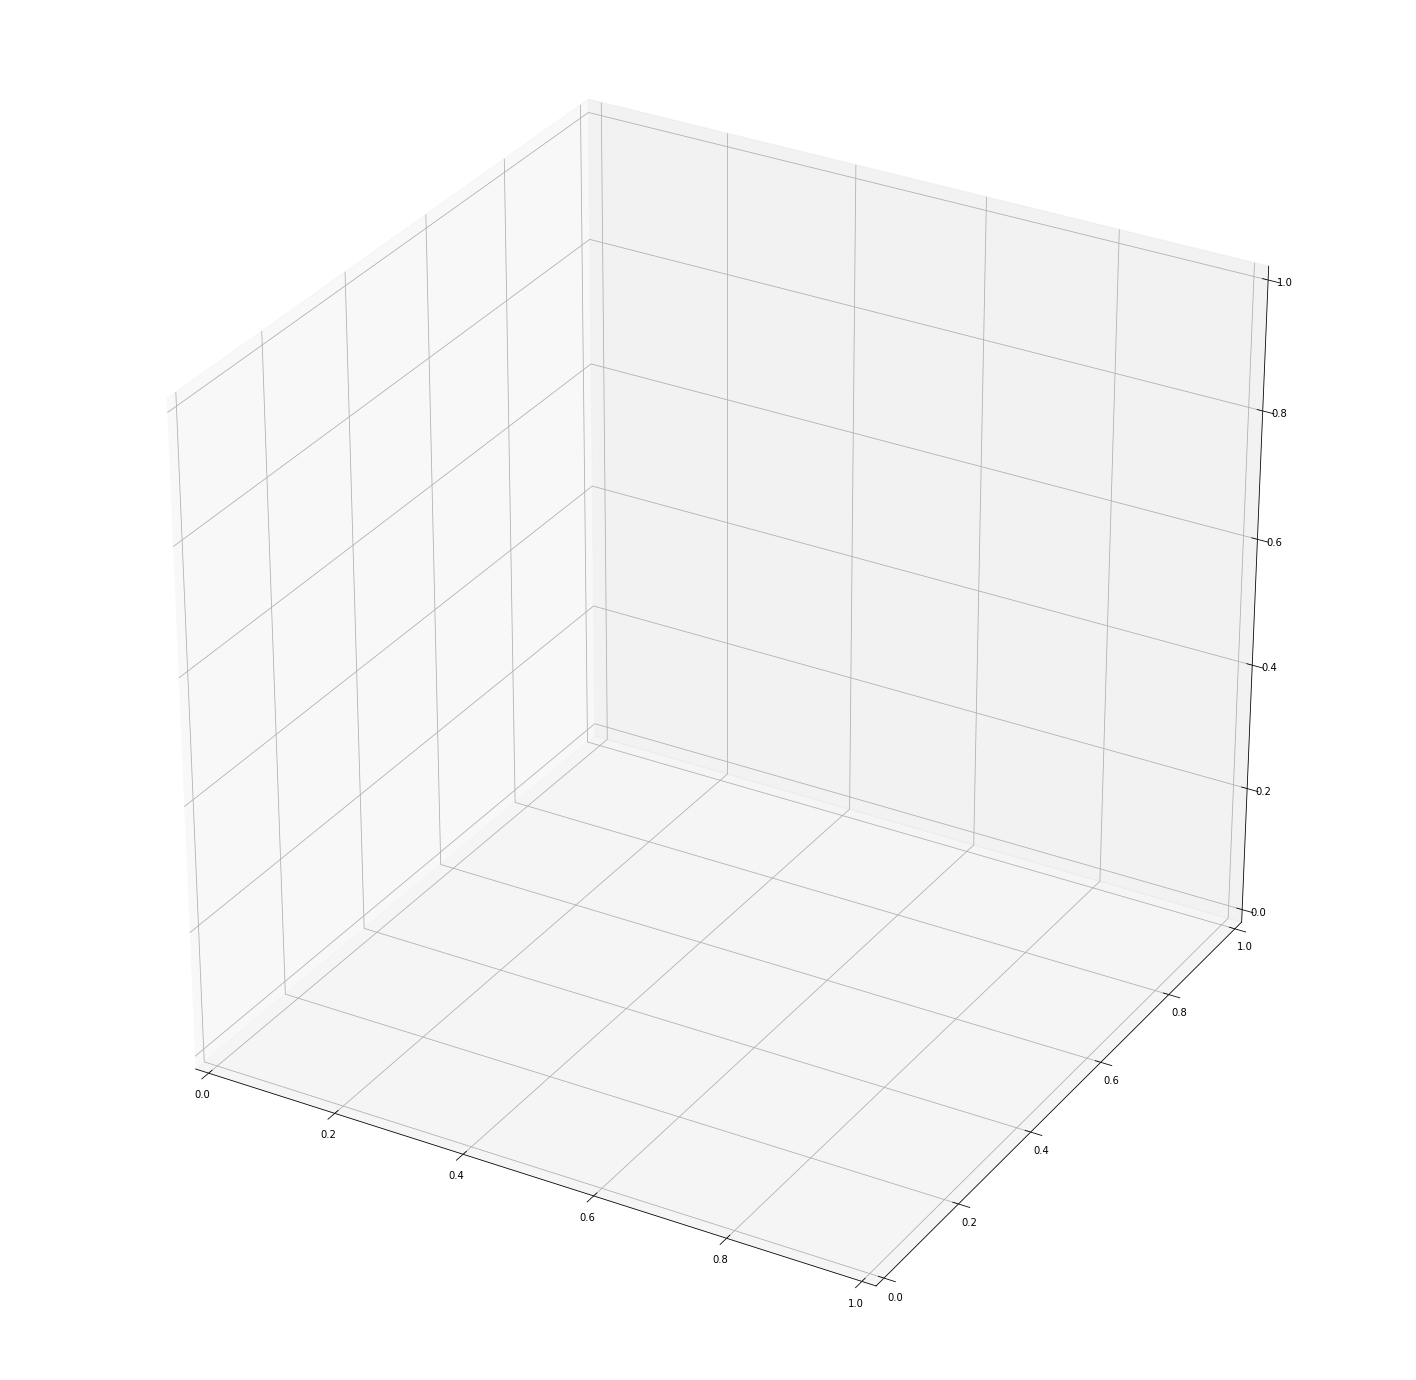

In [125]:
fig = plt.figure(figsize=(25,25))
ax = fig.add_subplot(111,projection='3d')

nb_classes = 4 #len(np.unique(label_ids))

In [126]:
labels = data['labels'].values
labels

array([1, 0, 2, ..., 2, 3, 2], dtype=uint8)

[[-1.3116031  -0.25447282 -1.365397  ]
 [-0.21372247 -1.062669    0.189016  ]
 [ 1.8550912   0.11073524  1.5592225 ]
 ...
 [ 1.2378831  -0.6431166   0.75211793]
 [ 1.0052668  -1.2802839   0.45509753]
 [ 1.126088   -0.18435784  1.1930693 ]]


NameError: name 'id_to_label_dict' is not defined

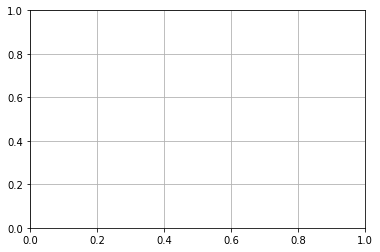

In [127]:
plt.grid()
tsne_result_scaled = StandardScaler().fit_transform(tnse_result)
print(tsne_result_scaled)
for label_id in [0,1,2,3]:
    ax.scatter(tsne_result_scaled[np.where(labels == label_id), 0],
                tsne_result_scaled[np.where(labels == label_id), 1],
                tsne_result_scaled[np.where(labels == label_id), 2],
                alpha=0.8,
                color= plt.cm.Set1(labels / float(4)),
                marker='o',
                label=id_to_label_dict[label_id])
ax.legend(loc='best')
ax.view_init(25, 45)
ax.set_xlim(-2.5, 2.5)
ax.set_ylim(-2.5, 2.5)
ax.set_zlim(-2.5, 2.5)